# Levy Symmetric $\alpha$ Stable
## Mantegna and New

In [1]:
import numpy as np

def levyDist(α, γ=1, n=1):
    """generate a stochastic variable whose probability density
    is arbitrary close to a Levy stable distribution
    characterized by arbitray chose cortol parameter
    0.3 <= α <= 1.99, γ > 0 
    standard normal: α = 2, γ = 0.5
    """
    #set control parameters given α
    if 0.8 <= α < 0.9:
        σx = 1.13999 - (α-0.8)*(1.13999-1.06618)/0.1
        Kα = 0.795112 + (α-0.8)*(0.899389-0.795112)/0.1
        Cα = 2.483 + (α-0.8)*(2.7675-2.483)/0.1
    elif 0.9 <= α < 1.0:
        σx = 1.06618 - (α-0.9)*(1.06618-1.0)/0.1
        Kα = 0.899389 + (α-0.9)*(1.0-0.899389)/0.1
        Cα = 2.7675 + (α-0.9)*(2.949-2.7675)/0.1
    elif 1.0 <= α < 1.1:
        σx = 1.0 - (α-1.0)*(1.0-0.938291)/0.1
        Kα = 1.0 + (α-1.0)*(1.10063-1.0)/0.1
        Cα = 2.949 - (α-1.0)*(2.949-2.945)/0.1
    elif 1.1 <= α < 1.2:
        σx = 0.938291 - (α-1.1)*(0.938291-0.878829)/0.1
        Kα = 1.10063 + (α-1.1)*(1.20519-1.10063)/0.1
        Cα = 2.945 - (α-1.1)*(2.945-2.941)/0.1
    elif 1.2 <= α < 1.3:
        σx = 0.878829 - (α-1.2)*(0.878829-0.819837)/0.1
        Kα = 1.20519 + (α-1.2)*(1.31836-1.20519)/0.1
        Cα = 2.941 - (α-1.2)*(2.941-2.9005)/0.1
    elif 1.3 <= α < 1.4:
        σx = 0.819837 - (α-1.3)*(0.819837-0.759679)/0.1
        Kα = 1.31836 + (α-1.3)*(1.44647-1.31836)/0.1
        Cα = 2.9005 - (α-1.3)*(2.9005-2.8315)/0.1
    elif 1.4 <= α < 1.5:
        σx = 0.759679 - (α-1.4)*(0.759679-0.696575)/0.1
        Kα = 1.44647 + (α-1.4)*(1.59922-1.44647)/0.1
        Cα = 2.8315 - (α-1.4)*(2.8315-2.737)/0.1
    elif 1.5 <= α < 1.6:
        σx = 0.696575 - (α-1.5)*(0.696575-0.628231)/0.1
        Kα = 1.59922 + (α-1.5)*(1.79361-1.59922)/0.1
        Cα = 2.737 - (α-1.5)*(2.737-2.6125)/0.1
    elif 1.6 <= α < 1.7:
        σx = 0.628231 - (α-1.6)*(0.628231-0.551126)/0.1
        Kα = 1.79361 + (α-1.6)*(2.06448-1.79361)/0.1
        Cα = 2.6125 - (α-1.6)*(2.6125-2.4465)/0.1
    elif 1.7 <= α < 1.8:
        σx = 0.551126 - (α-1.7)*(0.551126-0.458638)/0.1
        Kα = 2.06448 + (α-1.7)*(2.50147-2.06448)/0.1
        Cα = 2.4465 - (α-1.7)*(2.4465-2.206)/0.1
    elif 1.8 <= α < 1.9:
        σx = 0.458638 - (α-1.8)*(0.458638-0.333819)/0.1
        Kα = 2.50147 + (α-1.8)*(3.4615-2.50147)/0.1
        Cα = 2.206 - (α-1.8)*(2.206-1.7915)/0.1
    elif 1.9 <= α < 1.95:
        σx = 0.333819 - (α-1.9)*(0.333819-0.241176)/0.05
        Kα = 3.4615 + (α-1.9)*(4.80663-3.4615)/0.05
        Cα = 1.7915 - (α-1.9)*(1.7915-1.3925)/0.05
    elif 1.95 <= α <= 1.99:
        σx = 0.110693 - (α-1.95)*(0.241176-0.110693)/0.04
        Kα = 4.80663 + (α-1.95)*(10.498-4.80663)/0.04
        Cα = 1.3925 - (α-1.95)*(1.3925-0.8600)/0.04
    else:
        print('parameter α is between 0.8 and 1.99')
  
    w = 0.0
    α_inv = 1.0 / α
    for i in range(n):
        r1, r2 = np.random.standard_normal(2)
        x = σx * r1
        y = r2
        v = x / ((np.abs(y)) ** α_inv)
        w = w + ((Kα - 1) * np.exp(-np.abs(v)/Cα) + 1) * v
    return w * (γ / n) ** α_inv


In [2]:
import numpy as np

def newLevyDist(α, γ=1, n=1):
    """an efficient way to generate a Levy stable distribution
    developed in UWYO with mainly Silvia
    0.3 <= α <= 1.99, γ > 0 
    standard normal: α = 2, γ = 0.5
    """
    
    #set σx, σy given α
    if 0.7 <= α < 0.8:
        σx, σy = 0.880, 0.002
    elif 0.8 <= α < 0.9:
        σx, σy = 0.930, 0.001
    elif 0.9 <= α < 1.0:
        σx, σy = 0.971, 0.0009
    elif 1.0 <= α < 1.1:
        σx, σy = 1.0, 0.027
    elif 1.1 <= α < 1.2:
        σx, σy = 0.951, 0.215
    elif 1.2 <= α < 1.3:
        σx, σy = 0.855, 0.410
    elif 1.3 <= α < 1.4:
        σx, σy = 0.800, 0.523
    elif 1.4 <= α < 1.5:
        σx, σy = 0.729, 0.645
    elif 1.5 <= α < 1.6:
        σx, σy = 0.610, 0.800
    elif 1.6 <= α < 1.7:
        σx, σy = 0.396, 1.008
    elif 1.7 <= α < 1.8:
        σx, σy = 0.280, 1.100
    elif 1.8 <= α < 1.9:
        σx, σy = 0.110, 1.200
    elif 1.9 <= α < 1.95:
        σx, σy = 0.001, 1.231
    else:
        print('parameter α is between 0.7 and 1.9')

    
    w = 0.0
    α_inv = 1.0 / α
    for i in range(n):
        r1, r2 = np.random.normal(0,1,2)
        x = σx * r1
        y = r2
        v1 = x / ((np.abs(y)) ** α_inv)
        r1, r2 = np.random.normal(0,1,2)
        x = σy * r1
        y = r2
        v2 = x / ((np.abs(y)) ** α_inv)
        w = w + v1 + v2
    return w

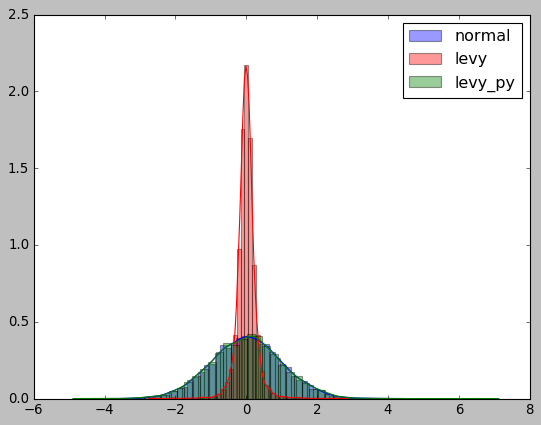

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levy_stable
%matplotlib inline

N = 10000
α = 1.99
γ = 0.5
scale = γ ** (1/α)
np.random.seed(1)

normal = np.random.standard_normal(N)
levy_py = levy_stable.rvs(alpha=α, beta=0, size=N, scale=scale)
levy = np.zeros(N)
for i in range(N):
    levy[i] = levyDist(α, γ, 1)

plt.style.use('classic')
sns.distplot(normal, color='blue', hist=True, label='normal')
sns.distplot(levy, color='red', hist=True, label='levy')
sns.distplot(levy_py, color='green', hist=True, label='levy_py')
plt.legend()
plt.show()

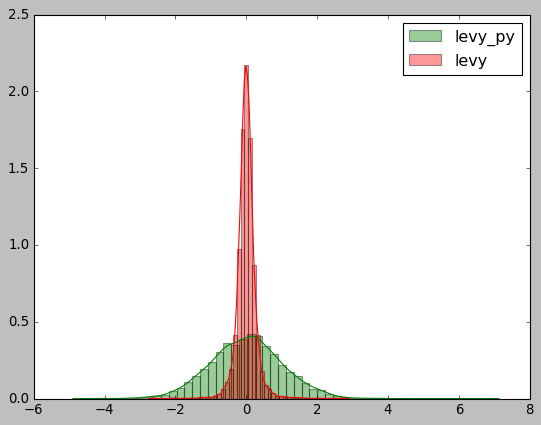

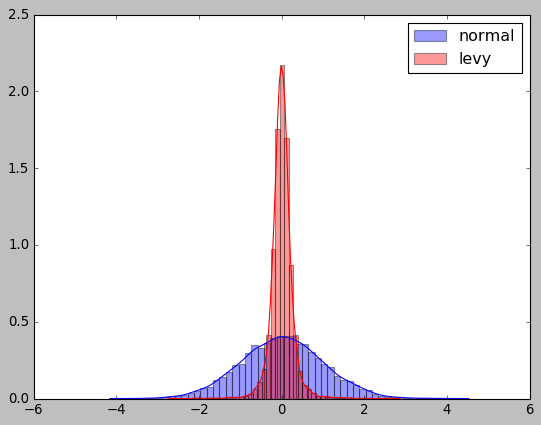

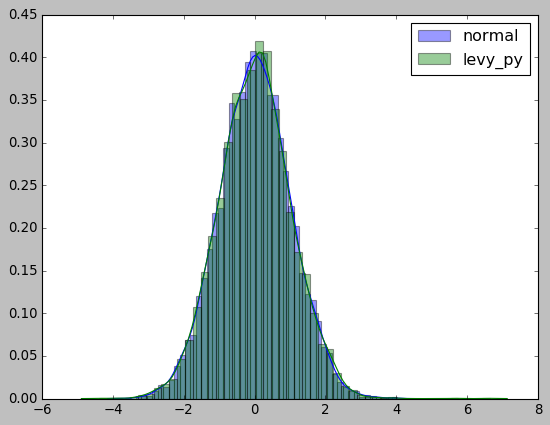

In [33]:
plt.figure(1)
sns.distplot(levy_py, color='green', hist=True, label='levy_py')
sns.distplot(levy, color='red', hist=True, label='levy')
plt.legend()

plt.figure(2)
sns.distplot(normal, color='blue', hist=True, label='normal')
sns.distplot(levy, color='red', hist=True, label='levy')
plt.legend()

plt.figure(3)
sns.distplot(normal, color='blue', hist=True, label='normal')
sns.distplot(levy_py, color='green', hist=True, label='levy_py')
plt.legend()



In [21]:
levy_py[N-1]

0.8678851673928261